In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cargar datos (asegúrate de que el archivo CSV tenga la columna 'fecha' y 'interacciones')
# Ejemplo: df = pd.read_csv('datos_redes_sociales.csv')
df=pd.read_excel('social_media_engagement_data_corregido.xlsx')


# Convertir la columna 'fecha' a tipo datetime
df['Fecha_Post'] = pd.to_datetime(df['Fecha_Post'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Plataforma       100000 non-null  object        
 1   Id               100000 non-null  object        
 2   Tipo             100000 non-null  object        
 3   Fecha_Post       100000 non-null  datetime64[ns]
 4   Likes            100000 non-null  int64         
 5   Comentarios      100000 non-null  int64         
 6   Compartidos      100000 non-null  int64         
 7   Impresiones      100000 non-null  int64         
 8   Alcance          100000 non-null  int64         
 9   Engagement Rate  100000 non-null  float64       
 10  Edad_Audiencia   100000 non-null  int64         
 11  Género           100000 non-null  object        
 12  País             100000 non-null  object        
 13  Id_Campaña       20132 non-null   object        
 14  Grupo Etario     1000

In [41]:
df_numerico = df[['Fecha_Post', 'Likes', 'Comentarios', 'Compartidos', 'Impresiones', 'Alcance']]

In [43]:
# Agrupar los datos por mes
df_mes = df_numerico.resample('ME', on='Fecha_Post').mean()

In [44]:
df_mes.head()

,Likes,Comentarios,Compartidos,Impresiones,Alcance
Fecha_Post,,,,,
2021-03-31,498.731434,243.564222,98.675385,5488.974311,4165.463802
2021-04-30,495.702782,247.799048,101.642387,5525.468521,4187.394949
2021-05-31,505.135789,255.686667,99.330526,5408.123509,4095.202807
2021-06-30,495.275416,246.277634,100.239556,5571.031793,4209.775970
2021-07-31,495.894792,251.870675,100.579518,5502.288361,4144.917511


In [47]:
df_mes['interacciones']=df_mes['Likes']+df_mes['Comentarios']+df_mes['Compartidos']

In [49]:
# Estandarizar los datos (interacciones)
scaler = StandardScaler()
df_mes['interacciones_estandarizadas'] = scaler.fit_transform(df_mes[['interacciones']])

In [51]:
# Convertir la fecha a número de meses desde la fecha inicial
df_mes['meses'] = (df_mes.index - df_mes.index.min()) / np.timedelta64(1, 'm')

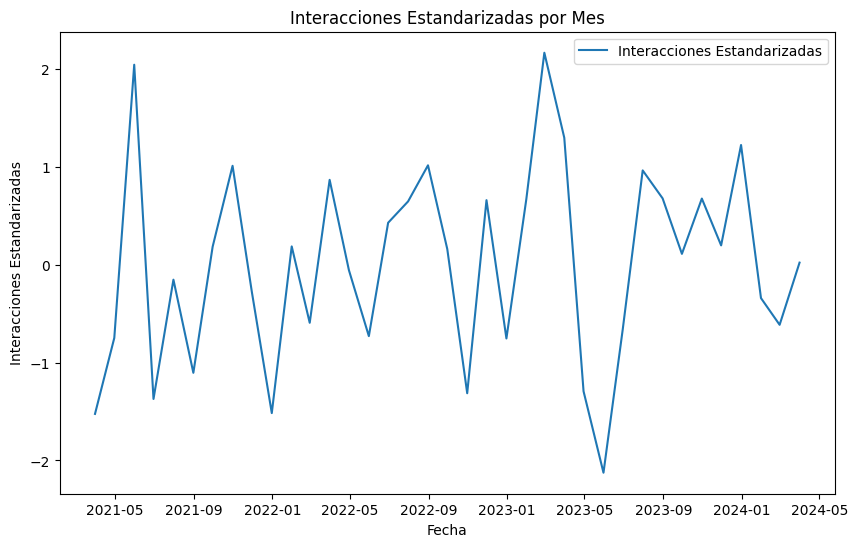

In [52]:
# Graficar los datos estandarizados
plt.figure(figsize=(10,6))
plt.plot(df_mes.index, df_mes['interacciones_estandarizadas'], label='Interacciones Estandarizadas')
plt.xlabel('Fecha')
plt.ylabel('Interacciones Estandarizadas')
plt.title('Interacciones Estandarizadas por Mes')
plt.legend()
plt.show()

In [54]:
# Ajustar el modelo de regresión lineal
X = df_mes[['meses']]  # Variable independiente (meses)
y = df_mes['interacciones_estandarizadas']  # Variable dependiente (interacciones estandarizadas)

In [55]:
# Dividir los datos en entrenamiento y prueba (aunque en este caso se puede usar todo el conjunto para ajustar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [56]:
# Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [57]:
# Realizar predicciones sobre el conjunto de prueba
df_mes['predicciones'] = modelo.predict(X)

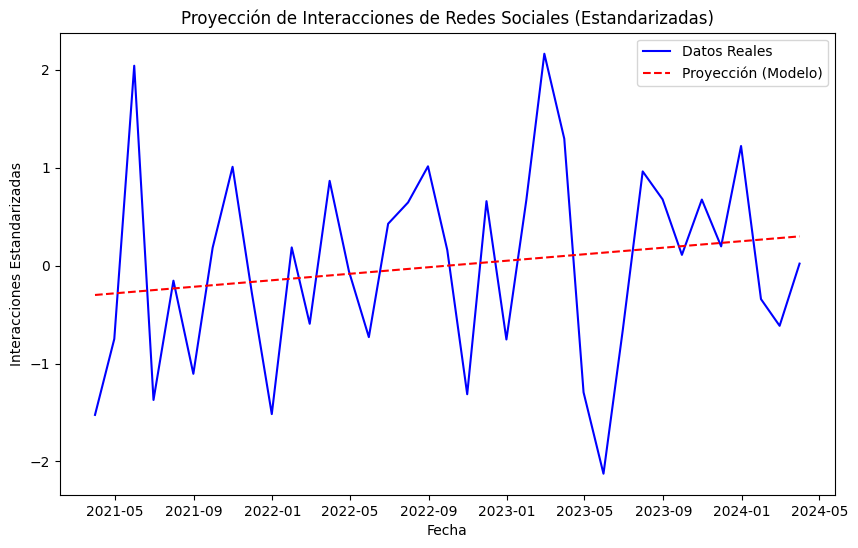

In [58]:
# Graficar las predicciones
plt.figure(figsize=(10,6))
plt.plot(df_mes.index, df_mes['interacciones_estandarizadas'], label='Datos Reales', color='blue')
plt.plot(df_mes.index, df_mes['predicciones'], label='Proyección (Modelo)', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Interacciones Estandarizadas')
plt.title('Proyección de Interacciones de Redes Sociales (Estandarizadas)')
plt.legend()
plt.show()

In [59]:
# Proyección a futuro (por ejemplo, los próximos 12 meses)
futuro = pd.DataFrame({'meses': np.arange(df_mes['meses'].max() + 1, df_mes['meses'].max() + 13)})
futuro['predicciones'] = modelo.predict(futuro[['meses']])

In [60]:
# Deshacer la estandarización para obtener las interacciones originales
futuro['interacciones_pred'] = scaler.inverse_transform(futuro[['predicciones']])

In [62]:
# Crear fechas futuras para la proyección
fechas_futuras = pd.date_range(df_mes.index[-1] + pd.Timedelta(days=1), periods=12, freq='ME')
futuro['fecha'] = fechas_futuras

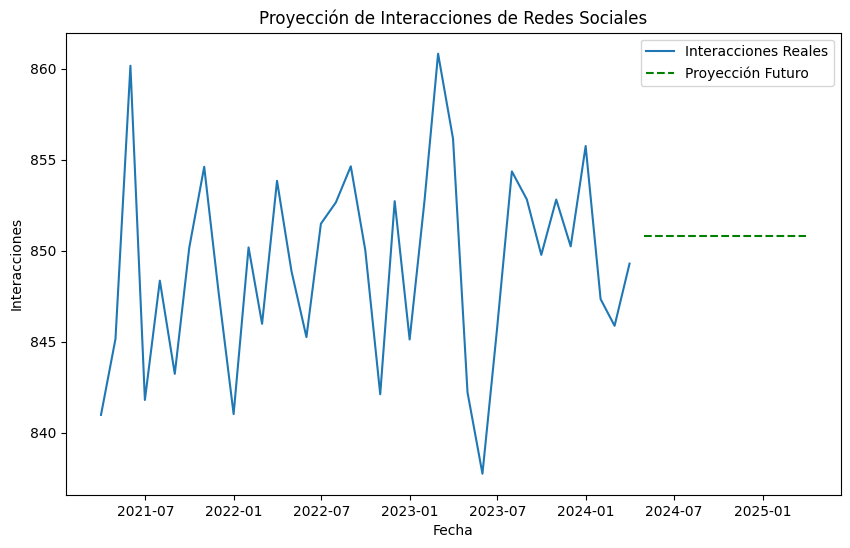

In [64]:
# Graficar la proyección futura
plt.figure(figsize=(10,6))
plt.plot(df_mes.index, df_mes['interacciones'], label='Interacciones Reales')
plt.plot(futuro['fecha'], futuro['interacciones_pred'], label='Proyección Futuro', color='green', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Interacciones')
plt.title('Proyección de Interacciones de Redes Sociales')
plt.legend()
plt.show()